## <font size=5> <strong>Heart Disease Prediction By Shreekant Gosavi


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## I. Importing essential libraries



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'drive', 'sample_data']


## II. Importing and understanding our dataset

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/heart.csv")

#### Verifying it as a 'dataframe' object in pandas

In [ ]:
type(dataset)

pandas.core.frame.DataFrame

#### Shape of dataset

In [ ]:

dataset.shape  #dataset은 303개의 행과 14개의 열을 가지고 있다.

(303, 14)

#### Printing out a few columns

In [ ]:
dataset.head(5) # 상위 5개 데이터 확인

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
dataset.sample(5) #랜덤한 5개 데이터 확인

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
213,61,0,0,145,307,0,0,146,1,1.0,1,0,3,0
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
198,62,1,0,120,267,0,1,99,1,1.8,1,2,3,0
146,44,0,2,118,242,0,1,149,0,0.3,1,1,2,1
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0


#### Description

In [ ]:
dataset.describe()  #데이터 기초통계정보 확인

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
dataset.info() #데이터 요약정보 확인, 결측치가 없음을 확인할 수 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### Let's understand our columns better:

In [ ]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


##데이터 소개


*   age : 환자의 나이
*   sex : 환자의 성별(0=여성, 1=남성)
*   cp : 흉통 유형(1=정형적 협심증, 2=비정형 협심증, 3=협심증이 아닌 통증, 4= 무증상)
*  trestbps: 안정 시 혈압
*  chol : 콜레스테롤(mg/dl)
*  fbs : 공복 혈당 > 120mg/dl (0=False, 1=True)
*  restecg : 안정 시 심전도 결과(0=Normal, 1=ST-T파 정상(T파 역전 또는 0.05mV 이상의 ST 상승 또는 하강)이 있음, 2=좌심실 비대)
*  thalachh : 최대 심박수 달성
*  oldpeak : 비교적 안정될 때까지 운동으로 유발되는 ST depression 이전 최고치
*  slope : 최대 운동 ST segment의 기울기
*  ca : 주요 혈관
*  thal : 탈륨 스트레스 테스트 결과 (3=정상, 6=수정된 결함, 7=되돌릴 수 있는 결함)
*  target : 목표 변수(0=심장마비 가능성 낮음, 1=심장마비 가능성 높음)


#### Analysing the 'target' variable

In [ ]:
dataset["target"].describe()  #target 기초통계량

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [ ]:
dataset["target"].unique()  #target 고유값

array([1, 0])

#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

In [ ]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))  #target과 각 변수들의 상관관계 분석

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


######가장 상관관계가 높은 변수는 exang, 가장 낮은 변수는 fbs이다.

In [ ]:
#This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

## Exploratory Data Analysis (EDA)

### First, analysing the target variable:

target
1    165
0    138
Name: count, dtype: int64


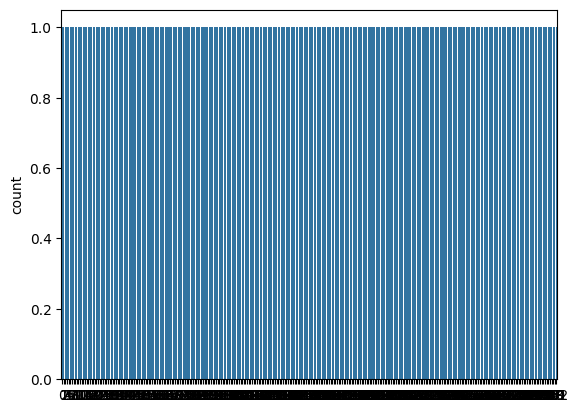

In [ ]:
#target 빈도 그래프화 0(심장마비 가능성 낮음)은 138개, 1(심장마비 가능성 높음)은 165개임을 확인할 수 있다.

y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

In [ ]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

#심장마비 가능성이 낮은 환자는 45.54%, 심장마비 가능성이 있는 환자는 54.46%이다.

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


### We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

## IV. Train Test split

In [ ]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

# 학습데이터 80%, 테스트 사이즈 20%로 데이터 분리
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

# X_train, Y_train을 train_test_split 함수를 사용하여 훈련 데이터(X_train, Y_train)와 검증 데이터(X_val, Y_val)로 나눕니다.
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)


In [ ]:
X_train.shape

(193, 13)

In [ ]:
X_test.shape

(61, 13)

In [ ]:
Y_train.shape

(193,)

In [ ]:
Y_test.shape

(61,)

## V. Model Fitting

In [ ]:
from sklearn.metrics import accuracy_score

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [ ]:
Y_pred_lr.shape

(61,)

In [ ]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2) # 예측된 결과와 실제 결과를 비교해 모델의 정확도 계산

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")
# 로지스틱 회귀의 정확도는 85.25%이다.

The accuracy score achieved using Logistic Regression is: 88.52 %


In [ ]:
#  compute_cost 함수는 로지스틱 회귀 모델의 비용을 계산
# 비용은 모델이 예측한 값과 실제 값 사이의 차이를 측정해 계산
#  update_parameters 함수는 모델의 가중치와 편향을 업데이트
# 이 함수는 모델의 예측이 실제와 얼마나 잘 일치하는지 측정해 모델의 성능을 평가

# update_parameters 함수는 가중치와 편향을 업데이트
# 경사 하강법을 사용해 비용 함수를 최소화하기 위해 모델 파라미터를 조정
# 경사 하강법 단계마다 새로운 가중치와 편향을 계산하고 업데이트
# 모델이 데이터를 잘 설명하는 방향으로 학습된다.

# compute_cost는 함수의 모델의 성능을 측정, update_parameters는 모델이 학습하는 데 필요한 파라미터를 조정

In [ ]:
import numpy as np

# 시그모이드 함수: 실수 값z를 받아 시그모이드 값 반환
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 로지스틱 회귀의 비용 계산
def compute_cost(X, y, theta):
    m = len(y) # 샘플 개수
    h = sigmoid(X.dot(theta))  # 예측값
    epsilon = 1e-5  # 로그 함수 안의 값이 0이 되는 것을 방지하기 위한 epsilon
    cost = (1/m) * (-y.dot(np.log(h + epsilon)) - (1 - y).dot(np.log(1 - h + epsilon)))
    return cost

# 경사 하강법을 사용해 파라미터 업데이트
def update_parameters(X, y, theta, learning_rate, num_iters): # learning_rate 학습률, num_iters 경사 하강법의 반복 횟수
    m = len(y)  # 샘플 개수
    cost_history = np.zeros(num_iters)  # 비용의 변화를 추적하기 위한 배열 초기화

    for i in range(num_iters):
        h = sigmoid(X.dot(theta))  # 예측값 계산
        gradient = (1/m) * X.T.dot(h - y)  # 비용 함수의 그래디언트 계산
        theta -= learning_rate * gradient  # 파라미터 업데이트

        cost = compute_cost(X, y, theta)  # 현재 비용 계산
        cost_history[i] = cost  # 비용 기록

    return theta, cost_history

학습된 theta 값: age        -1.461110
sex        -0.762142
cp          1.524410
trestbps   -4.135567
chol        0.240699
fbs         0.089700
restecg     0.037871
thalach     5.180183
exang      -0.776358
oldpeak    -2.281014
slope       0.611096
ca         -1.485807
thal       -0.947536
dtype: float64


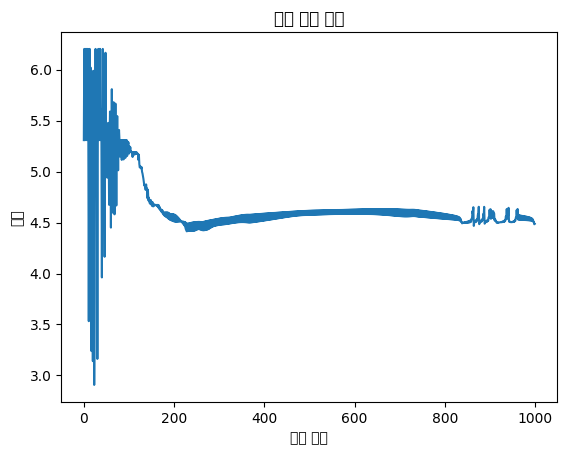

In [ ]:
# 모델 파라미터 초기화
theta = np.zeros(X_train.shape[1])

# 학습률과 반복 횟수 설정
learning_rate = 0.01
num_iters = 1000

# 모델 학습
theta, cost_history = update_parameters(X_train, Y_train, theta, learning_rate, num_iters)

# 학습된 모델의 파라미터 확인
print("학습된 theta 값:", theta)

# 비용의 변화 확인
plt.plot(range(num_iters), cost_history)
plt.xlabel("반복 횟수")
plt.ylabel("비용")
plt.title("비용 함수 변화")
plt.show()

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [ ]:
Y_pred_nb.shape

(61,)

In [ ]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


In [ ]:
# 시각화 코드

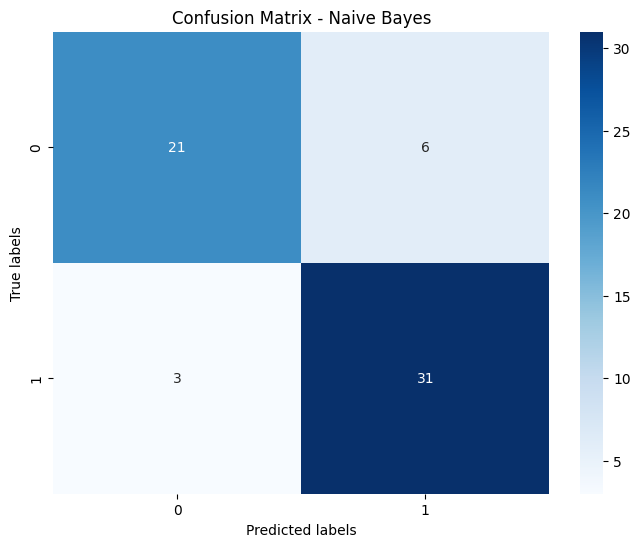

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 혼동 행렬 생성
conf_matrix_nb = confusion_matrix(Y_test, Y_pred_nb)

# 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()


In [ ]:
# 시각화 자료 해석 방법
# 주 대각선(대각선 요소)
# 주 대각선에 위치한 요소들은 예측된 클래스와 실제 클래스가 일치하는 경우를 보여줌
# 주 대각선의 값이 클수록 모델이 해당 클래스를 정확하게 예측했다.

# 비대각 요소들
# 비대각 요소는 모델이 클래스를 잘못 예측한 경우를 보여줌

# 정확성 : 주 대각선의 값이 클수록 모델이 더 정확하게 예측하는 경향이 있음

# 예측 모델 테스트 데이터는 총 61개를 예측
# TN 21개  FN 6개
# FP 3개   TP 31개

# 정확도(Accuracy) = (TP + TN) / (TP + TN + FP + FN)
# 0.8524 = (31+21) / (31+21+3+6)

# 재현율 = TP / (TP + FN)
# 0.8378 = 31 / (31+6)


# 참고자료
# https://diseny.tistory.com/entry/%ED%98%BC%EB%8F%99%ED%96%89%EB%A0%ACconfusion-matrix?category=906035
# https://truman.tistory.com/179
# https://jaylala.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-with-Python-%EC%98%A4%EC%B0%A8%ED%96%89%EB%A0%AC-or-%ED%98%BC%EB%8F%99%ED%96%89%EB%A0%ACConfusion-Matrix-%EC%9C%A0%EB%B0%A9%EC%95%94-%EB%8D%B0%EC%9D%B4%ED%84%B0Breast-Cancer-Data-%ED%99%9C%EC%9A%A9%ED%95%98%EC%97%AC-%EC%95%8C%EC%95%84%EB%B3%B4%EA%B8%B0


### SVM

In [ ]:
# Scikit-learn 라이브러리를 사용해 선형 SVM을 구현하고 테스트 데이터에 대한 예측 정확도 계산.
# 분류 작업을 숭행하는 지도 학습 알고리즘

In [ ]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [ ]:
Y_pred_svm.shape # 예측된 결과(Y_pred_svm)의 형태를 반환

(61,)

In [ ]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2) # 예측된 결과와 실제 결과(Y_test)를 비교하여 모델의 정확도를 계산

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 83.61 %


### K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [ ]:
Y_pred_knn.shape

(61,)

In [ ]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 70.49 %


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [ ]:
print(Y_pred_dt.shape)

(61,)


In [ ]:
# 시각화 코드

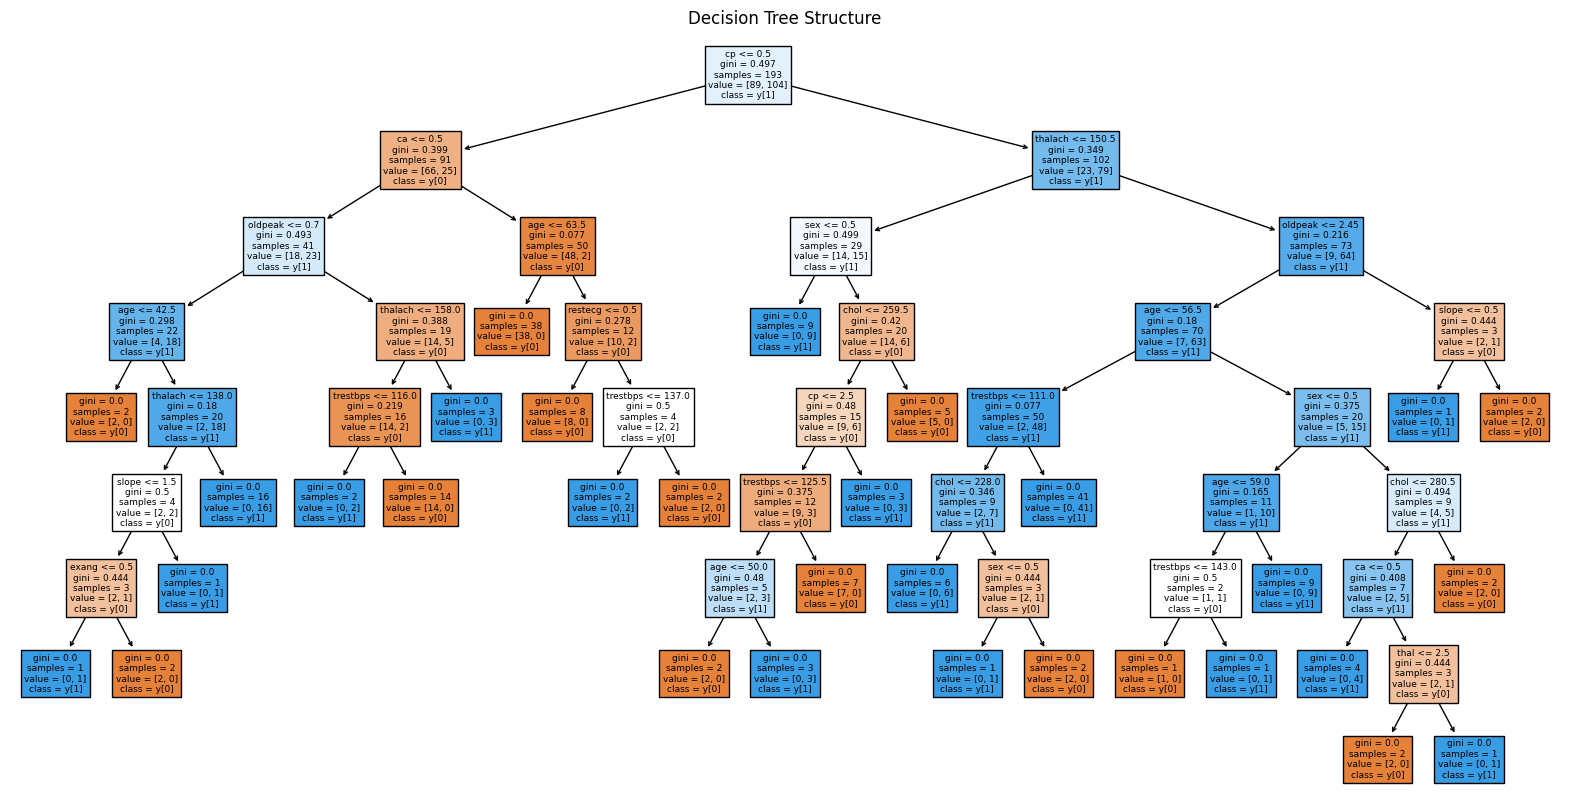

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=X_train.columns, class_names=True)
plt.title("Decision Tree Structure")
plt.show()


In [ ]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 80.33 %


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [ ]:
Y_pred_rf.shape

(61,)

In [ ]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 91.8 %


### XGBoost

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
Y_pred_xgb.shape

(61,)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# 혼동 행렬 생성
conf_matrix_xgb = confusion_matrix(Y_test, Y_pred_xgb)
print("혼동 행렬:\n", conf_matrix_xgb)


혼동 행렬:
 [[23  4]
 [ 5 29]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

def get_clf_eval(y_test, Y_pred_xgb):
    confusion = confusion_matrix(y_test, Y_pred_xgb)
    accuracy = accuracy_score(y_test, Y_pred_xgb)
    precision = precision_score(y_test, Y_pred_xgb)
    recall = recall_score(y_test, Y_pred_xgb)
    F1 = f1_score(y_test, Y_pred_xgb)
    AUC = roc_auc_score(y_test, Y_pred_xgb)
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

In [ ]:
get_clf_eval(Y_test, Y_pred_xgb)

오차행렬:
 [[23  4]
 [ 5 29]]

정확도: 0.8525
정밀도: 0.8788
재현율: 0.8529
F1: 0.8657
AUC: 0.8524


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

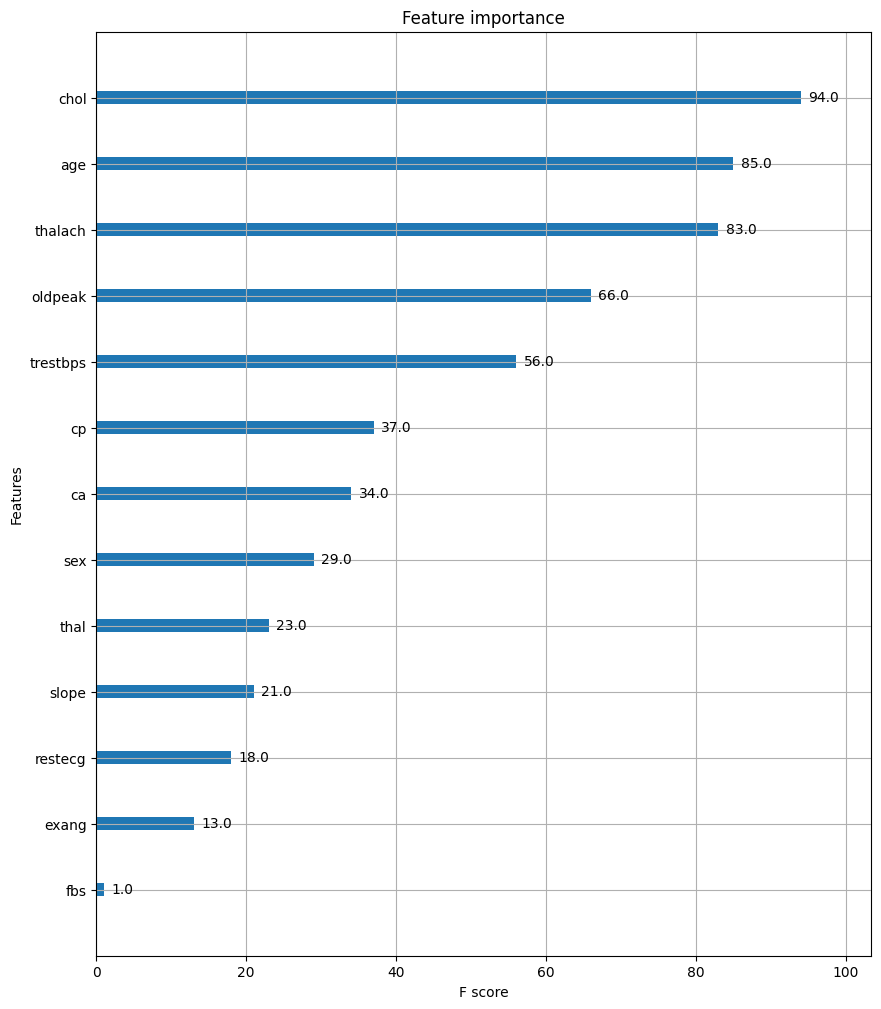

In [ ]:
#### 덧붙이는 코드

## 고전적인 전역 변수 중요도 측정 방법
## 값이 높을 수록 중요한 예측 변수에 해당한다.
## 참고사이트 : https://aldente0630.github.io/data-science/2018/12/10/interpretable_ml_with_xgb.html

from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

In [ ]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 85.25 %
